## .K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。



### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

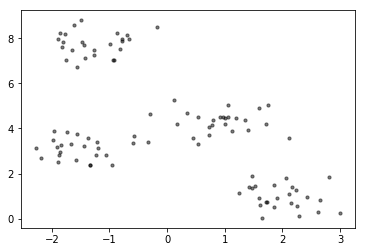

In [4]:
plt.scatter(X[:,0],X[:,1],c="black",s=10,alpha=0.5)
plt.show()

### 学習
K-meansの学習に必要な要素を順番に作成していきます。



### 【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。
 
  https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

https://www.sejuku.net/blog/64365

In [5]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [6]:
X[:5,:]#1サンプル数:100、特徴量数:2、中心の数:4になるようにプロット

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725]])

In [9]:
#ランダムに重心の初期値を初期化
random.seed(1)
k = 3
X_size = X.shape[0]
n_futures= X.shape[1]
#np.random.choice(X_size, k)#X_sizeまでの数で、クラスタ数分の点を取る。#
ν= X[np.random.choice(X_size, k)]#それぞれに対応するあるXを重心の初期値とする。


In [10]:
ν

array([[-1.57006498,  6.72375844],
       [-1.80044744,  7.86154256],
       [-1.21986433,  3.3789856 ]])

### 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

n
 : データ点のインデックス


k
 : クラスタのインデックス


X
n
 : 
n
番目のデータ点


μ
k
 : 
k
番目の中心点


r
n
k
 : データ点
X
n
がクラスタ
k
に所属していたら1、そうでなければ0


In [13]:
def _SSE(X, n_clusters):
    distance = np.zeros((X.shape[0] ,n_clusters))#距離用の箱
    for i in range(n_clusters):#クラスターの数ぶん繰り返す
        distance[: , i] = np.linalg.norm(X - centroids[i , :] , axis = 1)#distanceの列毎にXとcentroidsの距離
    sse=distance.min(axis=1).sum()#距離の最小値の合計
    #print(distance)#サンプル毎のそれぞれのクラスター(列)でのcentroidsとの距離
    return sse

_SSE(X, n_clusters)

131.4834767064542

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


中心点 
μ
k
 を固定した上で 
S
S
E
 を最小化する クラスタの割り当て 
r
n
k
 を選ぶ。
クラスタの割り当て 
r
n
k
 を固定した上で 
S
S
E
 を最小化する 中心点 
μ
k
 を選ぶ。

最初の中心点 
μ
k
 は問題1で作成した初期値です。


順番に見ていきます。

### 【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。
 NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 
μ
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。



$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

In [11]:
def _Euclid(self , X):
        """"
        クラスタへの割り当て
        """
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.νk[i , :] , axis = 1)
            self.y_pred = self.distance.argmin(axis = 1)

### 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [12]:
def _move_center(self , X):
        """
        中心点の移動
        """
        move_point = np.zeros((self.n_clusters , X.shape[1]))
        
        for k in range(self.n_clusters):
            move_point[k , :] = X[self.y_pred == k , :].mean(axis = 0)
        self.νk = move_point

### 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 
μ
k
 と重心の差が指定した許容値以下になる。（雛形では引数tol）

In [14]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters = 4, n_init = 3, max_iter = 100, tol = 1e-4, verbose=False , random_state=1):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  = tol
        self.verbose = verbose

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        self.SSE_n_init = np.zeros(self.n_init)
        self.νk_d = np.zeros((self.n_init , self.n_clusters , X.shape[1]) , dtype = np.int)
        """""
        異なる初期値で計算
        """
        for i in range(self.n_init):
            self.center_point(X)
            self.SSE_iter = []
            for k in range(self.max_iter):
                self._Euclid(X)
                self._move_center(X)
                self.SSE_iter.append(self._SSE())
                
                if k >= 1:
                    if self.SSE_iter[-2] == self.SSE_iter[-1]:
                        break
                self.SSE_n_init[i] = self.SSE_iter[-1]
                self.νk_d[i , : , :] = self.νk 
        
        self.result = self.νk_d[self.SSE_n_init.argmin() , : , :]
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(i , self.νk)
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.result[i , :] , axis = 1)
        
        self.y_pred = self.distance.argmin(axis = 1)
        return self.y_pred
    
    def center_point(self , X):
        """
        中心点の初期値
        """
        points = np.repeat(1 / X.shape[0] , X.shape[0])
        X_size = X.shape[0]
        self.νk  = X[np.random.choice(X_size,  self.n_clusters , replace=False)]
        return self.νk
    
    def _SSE(self):
        self.sse = np.sum(self.distance.min(axis = 1))
        return self.sse
    
    def _Euclid(self , X):
        """"
        クラスタへの割り当て
        """
        self.distance = np.zeros((X.shape[0] , self.n_clusters))
        
        for i in range(self.n_clusters):
            self.distance[: , i] = np.linalg.norm(X - self.νk[i , :] , axis = 1)
            self.y_pred = self.distance.argmin(axis = 1)
            
    def _move_center(self , X):
        """
        中心点の移動
        """
        move_point = np.zeros((self.n_clusters , X.shape[1]))
        
        for k in range(self.n_clusters):
            move_point[k , :] = X[self.y_pred == k , :].mean(axis = 0)
        self.νk = move_point

### 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

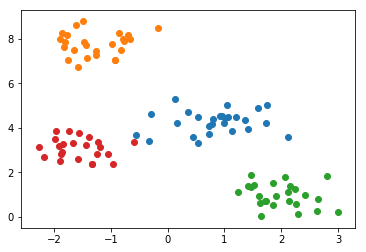

In [19]:
kmeans = ScratchKMeans()
kmeans.fit(X)
y= kmeans.predict(X)
for i in range(4):
    plt.scatter( X[ y == i , 0] , X[ y== i , 1])

### 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。

具体的には次のことです。


データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(X , test_size = 0.25)

In [20]:
kmeans.fit(X_train)
kmeans.predict(X_test)
y = kmeans.predict(X)

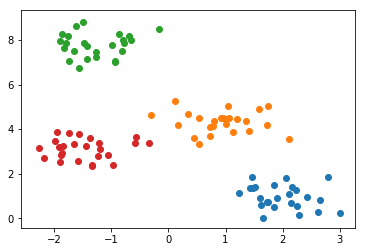

In [21]:
for i in range(4):
    plt.scatter( X[ y == i , 0] , X[ y == i , 1])

In [24]:
kmeans.SSE_n_init

array([71.1661146 , 45.85994812, 45.85994812])

### 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。



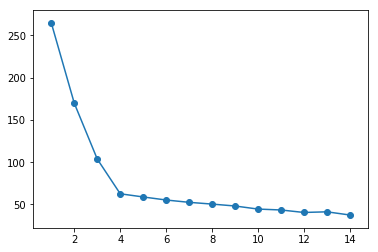

In [25]:
kmeans_elbow = ScratchKMeans()
SSE_list = []
for j in range(1 , 15):
    kmeans_elbow = ScratchKMeans(j)
    kmeans_elbow.fit(X)
    SSE_list.append(kmeans_elbow.SSE_n_init.min())
plt.plot(range(1,15),SSE_list)
plt.scatter(range(1,15),SSE_list)
plt.show()

## クラスタ分析

卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [28]:
# 《PCAのサンプルコード》


data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [31]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [32]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [34]:
##RegionとChannelは取り覗き、金額のデータでK-meansを利用
#対数化
data_log= np.log(data)

data_d = data_log.iloc[: , 2:]
data_c = data.iloc[: , 0]
data_r = data.iloc[: , 1]
data_d.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [35]:
##標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(data_d)
data_d_std = std.fit_transform(data_d)

In [36]:
##標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(data_d)
data_d_std = std.fit_transform(data_d)

In [37]:
#次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_d_std)
data_pca = pca.transform(data_d_std)

[0.43990911 0.71118573 0.81875328 0.92020054 0.96926786 1.        ]


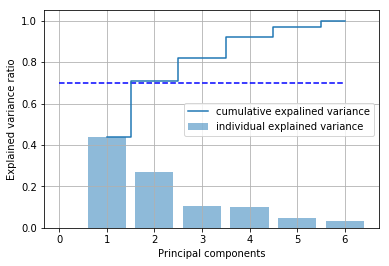

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data_d_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

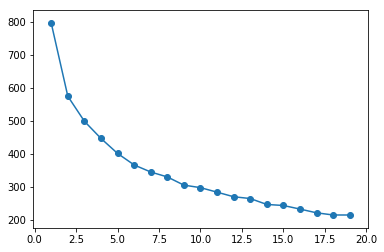

In [39]:
SSE_list = []
for i in range(1 , 20):
    kmeans_3 = ScratchKMeans(i)
    kmeans_3.fit(data_pca)
    SSE_list.append(kmeans_3.SSE_n_init.min())
plt.plot(range(1,20),SSE_list)
plt.scatter(range(1,20),SSE_list)
plt.show()

### 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

4か5を選択する。傾きが緩やかになっているから。

【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。



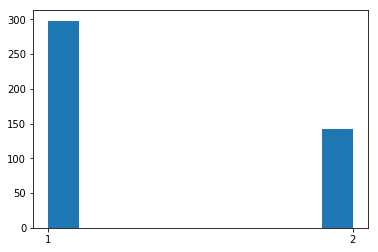

In [40]:
plt.hist(data_c)
plt.xticks([1,2])
plt.show()

Channelは１に偏りがある。

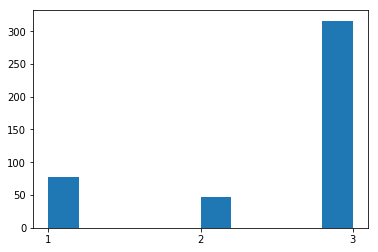

In [41]:
plt.hist(data_r)
plt.xticks([1,2,3])
plt.show()

Regionは3に偏りがある。